In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.4, palette='Set2')

In [3]:
variants_df = pd.read_csv('data/transformed_lineages.csv',header=0)
variants_df['total_sequences'] = variants_df.iloc[:,1:-1].sum(axis=1)
for col in list(variants_df):
    if col != 'week' and col != 'total_sequences':
        col_name = 'proportion_' + col
        variants_df[col_name] = variants_df[col] / variants_df['total_sequences']
variants_df.head(20)
variants_df.fillna(0, inplace=True)


In [5]:
tests_df = pd.read_csv('data/percent_positivities.csv', header=0)
percent_positivity = tests_df[['rate(positive_test)', 'week']]

In [6]:
combined_df = variants_df.merge(percent_positivity, on='week')
proportion_variants_cols = [c for c in combined_df.columns.values if 'proportion' in c] 

In [20]:
combined_df.tail(10)

,week,BA.2.12.1,BA.5,BA.4,BA.2.3.2,BA.2.3,BA.2,BA.2.33,BA.2.12,BA.2.9,...,proportion_BA.1.1.9,proportion_AY.122,proportion_BA.1.21,proportion_AY.20,proportion_AY.4.2,proportion_XS,proportion_AY.119.1,proportion_AY.3.3,proportion_AY.122.6,rate(positive_test)
15,16,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.039163
16,17,0,0,0,0,1,2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.052517
17,18,56,2,2,2,22,59,0,10,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.060185
18,19,75,4,7,1,16,76,0,6,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.069480
19,20,81,1,1,0,5,41,0,4,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.087817
20,21,78,2,0,0,5,17,0,7,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.101121
21,22,20,2,2,0,0,4,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.114922
22,23,64,20,11,0,1,12,0,5,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.127855
23,24,70,40,14,0,3,11,0,5,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.128550
24,25,38,35,23,1,1,4,2,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.138264


In [8]:
positive_variant_frac_df = combined_df[proportion_variants_cols].apply(lambda x: x*combined_df['rate(positive_test)'])
positive_variant_frac_df['week'] = combined_df['week']

In [9]:
week = positive_variant_frac_df['week']
variants_dict = {}
for col in list(positive_variant_frac_df):
    if 'proportion' in col:
        variants_dict[col] = positive_variant_frac_df[col].tolist()

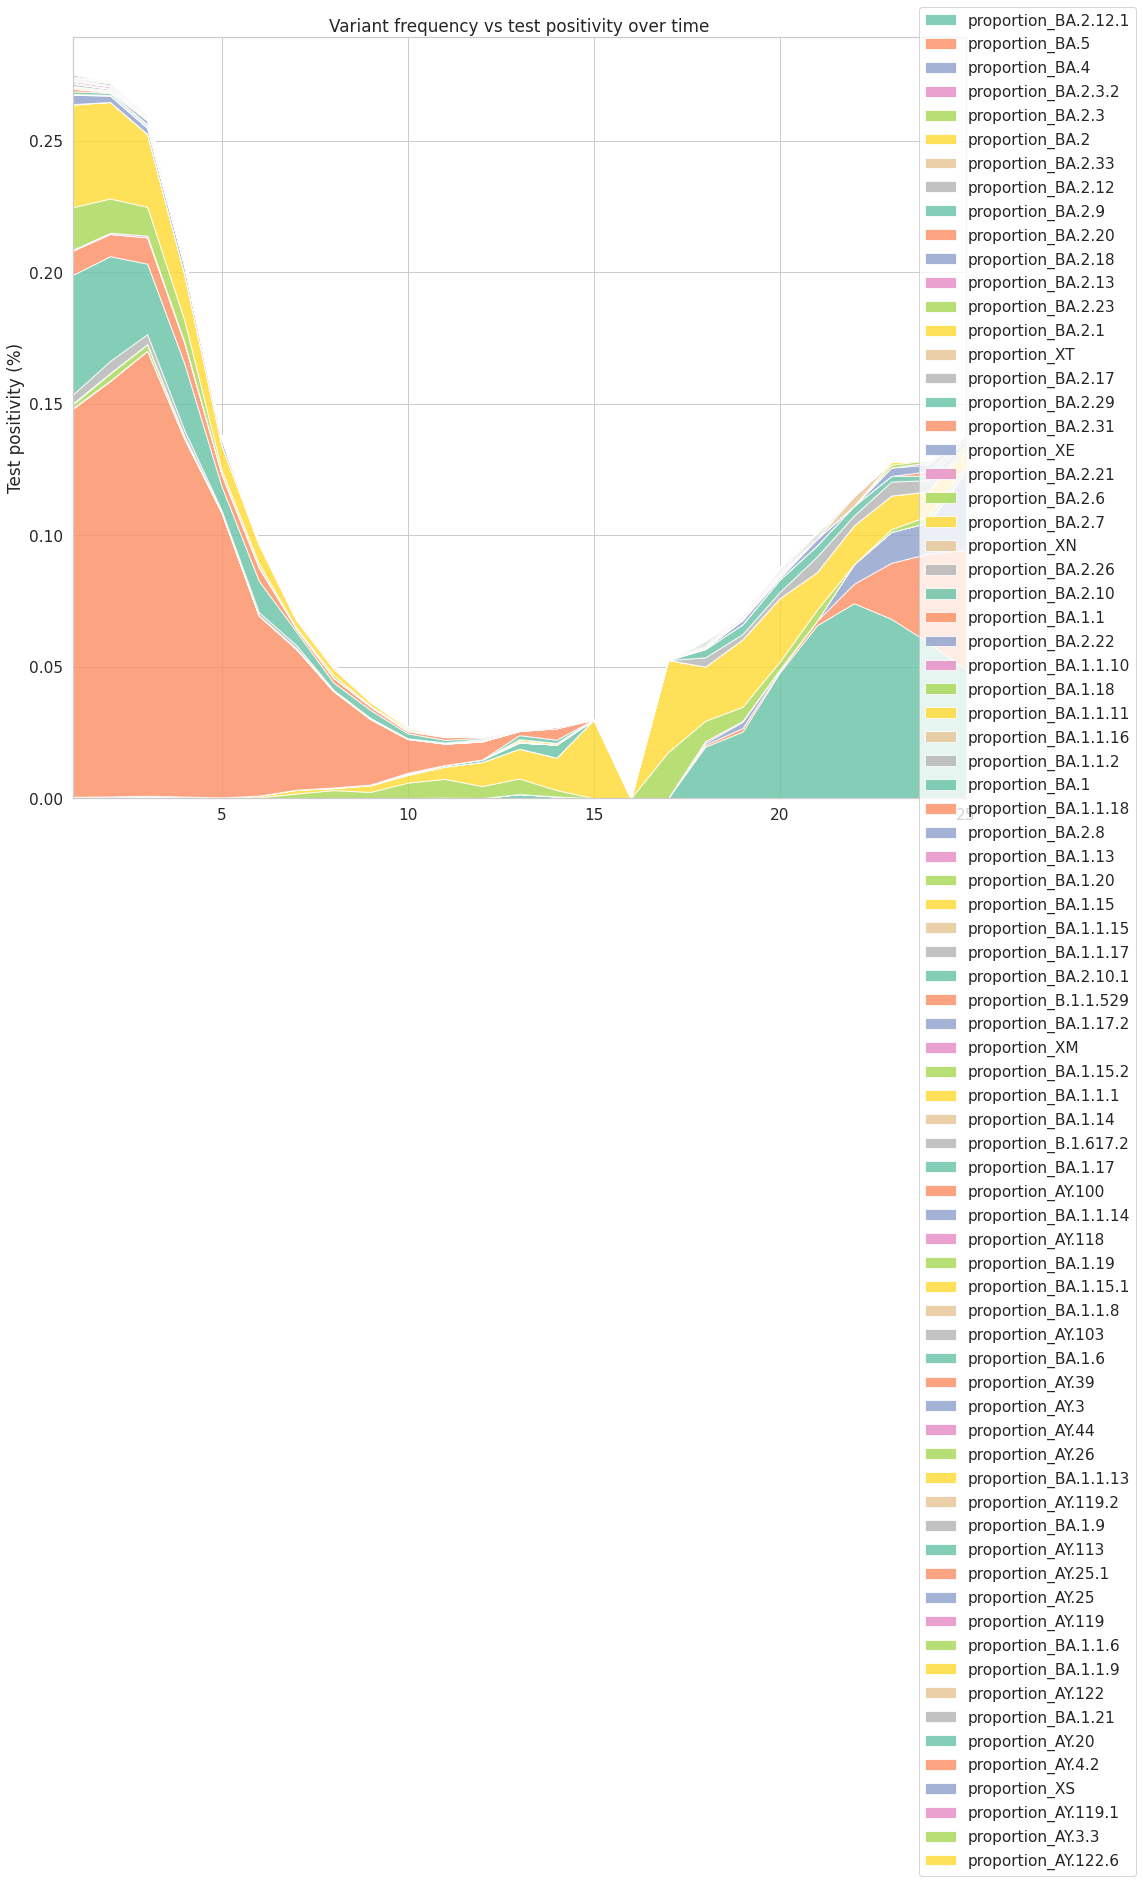

In [18]:
fig, ax = plt.subplots(figsize=(16,14))
## feed in binned dates (weekly) in place of 'year'
ax.stackplot(week, variants_dict.values(),
             labels=variants_dict.keys(), alpha=0.8)
#ax.legend(loc='lower left')
ax.legend(bbox_to_anchor=(1.2, 1.05))
ax.set_title('Variant frequency vs test positivity over time')
ax.set_ylabel('Test positivity (%)')

ax.set_xlim(1, 25)
plt.show()